# Donkey Car Training using Google Colab

Train your donkey car model using accelerated GPU for FREE on Google Colab

## Check GPU allocation
If "Found GPU at: / device: GPU: 0" is displayed, the GPU is ready to use.

In [1]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.7.0
Uninstalling tensorflow-2.7.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.7.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? yes
Your response ('yes') was not one of the expected responses: y, n
Proceed (y/n)? y
y
  Successfully uninstalled tensorflow-2.7.0


In [2]:
!pip install tensorflow==2.2.0

     |████████████████████████████████| 516.2 MB 4.5 kB/s 
     |████████████████████████████████| 454 kB 45.2 MB/s 
     |████████████████████████████████| 3.0 MB 25.6 MB/s 
     |████████████████████████████████| 2.9 MB 26.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0


In [3]:
import tensorflow
print(tensorflow.__version__)

2.2.0


In [ ]:
import glob
from IPython.display import Image

## Git Clone the donkey repository

In [4]:
!git clone https://github.com/autorope/donkeycar.git 

Cloning into 'donkeycar'...
remote: Enumerating objects: 14271, done.
remote: Counting objects: 100% (1189/1189), done.
remote: Compressing objects: 100% (550/550), done.
remote: Total 14271 (delta 817), reused 918 (delta 632), pack-reused 13082
Receiving objects: 100% (14271/14271), 89.25 MiB | 34.09 MiB/s, done.
Resolving deltas: 100% (9341/9341), done.


In [5]:
!ls

donkeycar  sample_data


In [6]:
%cd donkeycar

!git checkout master

/content/donkeycar
Branch 'master' set up to track remote branch 'master' from 'origin'.
Switched to a new branch 'master'


## Install donkey car

In [7]:
!pip3 install -e .[pc]

Obtaining file:///content/donkeycar
     |████████████████████████████████| 99 kB 3.4 MB/s 
     |████████████████████████████████| 865 kB 34.6 MB/s 
     |████████████████████████████████| 19.2 MB 24.7 MB/s 
  Created wheel for Kivy-Garden: filename=Kivy_Garden-0.1.4-py3-none-any.whl size=4531 sha256=16214660635691fe6343bcf42464ee038b3774447a7d29824e244483937dc221
  Stored in directory: /root/.cache/pip/wheels/3f/43/e3/50289d555356f0421d1c388c82d052d5788f22a34d0cd8659d
  Created wheel for paho-mqtt: filename=paho_mqtt-1.6.1-py3-none-any.whl size=62133 sha256=3938cf56b73ad81841803ac90d79c411ae8c3c9b6420c113bad8dd344802b31e
  Stored in directory: /root/.cache/pip/wheels/d0/bf/ac/2b3f43f8c6fcd0f4ba5395397458c521eb0b52d33b574a5a40
  Created wheel for progress: filename=progress-1.6-py3-none-any.whl size=9628 sha256=b422c4c121d7b177e1522e9e90914cbe922241e68ec4fa254a86b7f9daa57b92
  Stored in directory: /root/.cache/pip/wheels/8e/d7/61/498d8e27dc11e9805b01eb3539e2ee344436fc226daeb5fe87
Succ

## Create Project

In [8]:
!donkey createcar --path /content/mycar

________             ______                   _________              
___  __ \_______________  /___________  __    __  ____/_____ ________
__  / / /  __ \_  __ \_  //_/  _ \_  / / /    _  /    _  __ `/_  ___/
_  /_/ // /_/ /  / / /  ,<  /  __/  /_/ /     / /___  / /_/ /_  /    
/_____/ \____//_/ /_//_/|_| \___/_\__, /      \____/  \__,_/ /_/     
                                 /____/                              

using donkey v4.2.1 ...
Creating car folder: /content/mycar
making dir  /content/mycar
Creating data & model folders.
making dir  /content/mycar/models
making dir  /content/mycar/data
making dir  /content/mycar/logs
Copying car application template: complete
Copying car config defaults. Adjust these before starting your car.
Copying train script. Adjust these before starting your car.
Copying calibrate script. Adjust these before starting your car.
Copying my car config overrides
Donkey setup complete.


## Prepare Data
### Copy the following code and run on pi


```bash
cd ~/mycar/data
tar -czf tub_xx_yyyy_mm_dd.tar.gz tub_xx_yyyy_mm_dd

```

This will create a tub_xx_yyyy_mm_dd.tar.gz file under ~/mycar/data

## Upload Data


### Copy the tub to your local pc

Run this on your local pc if you are using linux/mac
```
sftp pi@raspberry.local
cd ~/mycar/data
get tub_xx_yyyy_mm_dd.tar.gz
```

If you are on a windows, download sftp utility like [filezilla](https://filezilla-project.org/) or [putty](https://www.chiark.greenend.org.uk/~sgtatham/putty/latest.html)

### Define your tub name here

In [9]:
tub_name="tub_41_21-11-21"

### Upload the tub to Google Drive

First upload the tub_x_yyyy_mm_dd.tar.gz to Google Drive. We will then mount Google Drive from colab and copy the data from Drive directly. When you run the cell below, you will need to click the link and generate an authorization code to for colab to access your drive.

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Suppose you upload the tub_xx_yyyy_mm_dd.tar.gz to Google Drive/mycar/tub_xx_yyyy_mm_dd.tar.gz, this is how you copy it from Google Drive to colab

In [11]:
%cd /content/mycar/data
!cp /content/drive/MyDrive/Data_SD_card/data/{tub_name}.zip .

/content/mycar/data


And untar it to the right place

In [12]:
!unzip {tub_name}.zip

Archive:  tub_41_21-11-21.zip
  inflating: tub_41_21-11-21/catalog_1.catalog_manifest  
  inflating: tub_41_21-11-21/catalog_0.catalog_manifest  
  inflating: tub_41_21-11-21/meta.json  
  inflating: tub_41_21-11-21/catalog_3.catalog_manifest  
  inflating: tub_41_21-11-21/tub_41_21-11-21_hist.png  
  inflating: tub_41_21-11-21/manifest.json  
  inflating: tub_41_21-11-21/catalog_2.catalog_manifest  
  inflating: tub_41_21-11-21/catalog_4.catalog  
  inflating: tub_41_21-11-21/catalog_2.catalog  
  inflating: tub_41_21-11-21/catalog_4.catalog_manifest  
  inflating: tub_41_21-11-21/catalog_1.catalog  
  inflating: tub_41_21-11-21/catalog_3.catalog  
  inflating: tub_41_21-11-21/catalog_0.catalog  
  inflating: tub_41_21-11-21/images/4462_cam_image_array_.jpg  
  inflating: tub_41_21-11-21/images/4461_cam_image_array_.jpg  
  inflating: tub_41_21-11-21/images/4468_cam_image_array_.jpg  
  inflating: tub_41_21-11-21/images/4465_cam_image_array_.jpg  
  inflating: tub_41_21-11-21/images/4

Check whether the data is there

In [13]:
!ls {tub_name}

catalog_0.catalog	    catalog_3.catalog_manifest
catalog_0.catalog_manifest  catalog_4.catalog
catalog_1.catalog	    catalog_4.catalog_manifest
catalog_1.catalog_manifest  images
catalog_2.catalog	    manifest.json
catalog_2.catalog_manifest  meta.json
catalog_3.catalog	    tub_41_21-11-21_hist.png


In [14]:
!ls

tub_41_21-11-21  tub_41_21-11-21.zip


In [ ]:
!donkey tubclean /content/mycar/data/tub_41_21-11-21

________             ______                   _________              
___  __ \_______________  /___________  __    __  ____/_____ ________
__  / / /  __ \_  __ \_  //_/  _ \_  / / /    _  /    _  __ `/_  ___/
_  /_/ // /_/ /  / / /  ,<  /  __/  /_/ /     / /___  / /_/ /_  /    
/_____/ \____//_/ /_//_/|_| \___/_\__, /      \____/  \__,_/ /_/     
                                 /____/                              

using donkey v4.2.1 ...
Listening on 8886...
Traceback (most recent call last):
  File "/usr/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
    self._run_once()
  File "/usr/lib/python3.7/asyncio/base_events.py", line 1750, in _run_once
    event_list = self._selector.select(timeout)
  File "/usr/lib/python3.7/selectors.py", line 468, in select
    fd_event_list = self._selector.poll(timeout, max_ev)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/bin/donkey", lin

## Train your model

train types: linear, categorical, inferred, tflite_linear, tensorrt_linear

mypilot: linear  
mypilot2: categorical  
mypilot3: inferred  
mypilot4: tflite_linear

In [53]:
%cd /content/mycar
!python train.py --tub /content/mycar/data/{tub_name} --type inferred --model /content/mycar/models/inferred2_tf2_2.h5

/content/mycar
________             ______                   _________              
___  __ \_______________  /___________  __    __  ____/_____ ________
__  / / /  __ \_  __ \_  //_/  _ \_  / / /    _  /    _  __ `/_  ___/
_  /_/ // /_/ /  / / /  ,<  /  __/  /_/ /     / /___  / /_/ /_  /    
/_____/ \____//_/ /_//_/|_| \___/_\__, /      \____/  \__,_/ /_/     
                                 /____/                              

using donkey v4.2.1 ...
loading config file: /content/mycar/config.py
loading personal config over-rides from myconfig.py
"get_model_by_type" model Type is: inferred
Created KerasInferred
2021-12-07 18:00:07.856041: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-12-07 18:00:07.877122: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-07 18:0

Check if the model is generated



In [48]:
!ls -alh /content/mycar/models

total 48M
drwxr-xr-x 2 root root 4.0K Dec  7 17:57 .
drwxr-xr-x 5 root root 4.0K Dec  7 17:51 ..
-rw-r--r-- 1 root root 9.5M Dec  7 17:37 categorical_tf2_2.h5
-rw-r--r-- 1 root root  30K Dec  7 17:37 categorical_tf2_2.png
-rw-r--r-- 1 root root  71K Dec  7 17:57 database.json
-rw-r--r-- 1 root root 9.5M Dec  7 17:45 inferred_tf2_2.h5
-rw-r--r-- 1 root root  26K Dec  7 17:46 inferred_tf2_2.png
-rw-r--r-- 1 root root 9.5M Dec  7 17:56 linear2_tf2_2.h5
-rw-r--r-- 1 root root  26K Dec  7 17:57 linear2_tf2_2.png
-rw-r--r-- 1 root root 9.5M Dec  7 17:29 linear_tf2_2.h5
-rw-r--r-- 1 root root  25K Dec  7 17:30 linear_tf2_2.png
-rw-r--r-- 1 root root 9.5M Dec  7 17:50 tflite_linear_tf2_2.h5
-rw-r--r-- 1 root root  29K Dec  7 17:51 tflite_linear_tf2_2.png


/content/mycar/models


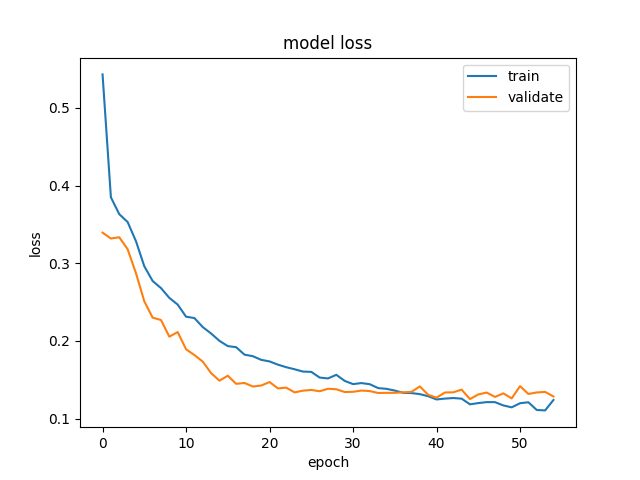

In [50]:
%cd /content/mycar/models

import glob
file = glob.glob("*.png")
  
from IPython.display import Image
Image(file[2])

## Copy the trained model back to Donkey Car (Pi)

Once the training is complete on colab, download the model file under /content/mycar/models/ folder location.

In [51]:
from google.colab import files

files.download('./linear2_tf2_2.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Alternatively, you can copy the model back to Google Drive too

In [52]:
!cp /content/mycar/models/linear2_tf2_2.h5 /content/drive/MyDrive/Data_SD_card/models/linear2_tf2_2.h5
!cp /content/mycar/models/linear2_tf2_2.png /content/drive/MyDrive/Data_SD_card/models/linear2_tf2_2.png

### Copy the file from your PC or Mac to the Raspberry Pi using Filezilla or scp command.

```
sftp pi@raspberry.local
cd mycar/models
put mypilot.h5
```

## Start Autopilot on Pi


```bash
cd ~/mycar
python manage.py drive --model models/mypilot.h5 --js
```


## Bonus - Salient Object Visualization

In [ ]:
# !pip install git+https://github.com/autorope/keras-vis.git
!pip uninstall keras-vis
!pip install git+https://github.com/sctse999/keras-vis
  
  

In [ ]:
%cd /content/mycar
!donkey makemovie --tub data/{tub_name} --model models/mypilot.h5 --type linear --salient

In [ ]:
from google.colab import files

%cd /content/mycar
!ls -ahl
files.download('tub_movie.mp4')